# Autism Screening in Adults Prediction

Goal: To predict autism in adults

# About the Data

Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

# Features and Descriptions

| Variable Name | Role | Variable Type | Description | 
| :- | :- | :- | :- |
| A1 Score | Feature | Integer | The answer of the question based on the screeing method used | 
| A2 Score | Feature | Integer | The answer of the question based on the screeing method used | 
| A3 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A4 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A5 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A6 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A7 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A8 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A9 Score | Feature | Integer | The answer of the question based on the screeing method used |
| A10 Score | Feature | Integer | The answer of the question based on the screeing method used |
| age | Feature | Integer | Age in years |
| gender | Feature | Categorical | Male or Female |
| ethnicity | Feature | Categorical | Ethnicity |
| jaundice | Feature | Categorical | Whether the case was born with jaundice |
| family_pdd | Feature | Categorical | Whether any immediate family member has a PDD |
| country_of_res | Feature | Categorical | Nationality |
| used_app_before | Feature | Categorical | Whether the user has used a screening app previously |
| result | Feature | Integer | Score from the screening test |
| age_desc | Feature | Categorical | Range of age of the patient |
| relation | Feature | Categorical | Relation of patient who completed the test |
| class | Target | Categorical | The final score obtained based on the scroring algorithm of the screening method used |

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [4]:
df = pd.read_csv('Autism Screening.csv')

# EDA

In [6]:
print(df.shape)
print(df.head())
print(df.info())


(704, 21)
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice austim  \
0         1         0          0  ...      f  White-European      no     no   
1         1         0          1  ...      m          Latino      no    yes   
2         1         1          1  ...      m          Latino     yes    yes   
3         1         0          1  ...      f  White-European      no    yes   
4         1         0          0  ...      f               ?      no     no   

     contry_of_res used_app_before result       age_desc relatio

In [10]:
# Convert age from object to numeric, coerce errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

In [12]:
def prettify_df(df):
    table = PrettyTable()
    table.field_names = df.columns

    for row in df.values:
        table.add_row(row)
    print(table)

tmp = pd.DataFrame(index=df.columns)
tmp['count'] = df.count()
tmp['dtype'] = df.dtypes
tmp['nunique'] = df.nunique()
tmp['%nunique'] = (tmp['nunique']/len(df))*100
tmp['%null'] = (df.isnull().sum()/len(df))*100
tmp['min'] = df.min()
tmp['max'] = df.max()
tmp

tmp.reset_index(inplace=True)
tmp = tmp.rename(columns = {"index":"Column Name"})
tmp = tmp.round(3)
prettify_df(tmp)
del tmp

+-----------------+-------+---------+---------+----------+-------+----------------------------+---------------+
|   Column Name   | count |  dtype  | nunique | %nunique | %null |            min             |      max      |
+-----------------+-------+---------+---------+----------+-------+----------------------------+---------------+
|     A1_Score    |  702  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A2_Score    |  702  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A3_Score    |  702  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A4_Score    |  702  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A5_Score    |  702  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A6_Score    |  702  |  int64  |    2    |  0.285   |  0.0  |             0              |       1 

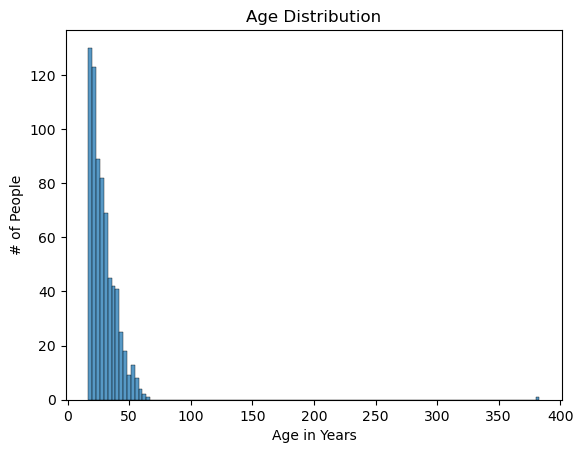

In [14]:
# Check histogram of 'age' to see outlier

sns.histplot(df['age'])
plt.title("Age Distribution")
plt.ylabel('# of People')
plt.xlabel('Age in Years')
plt.show()

In [16]:
# Drop the outlier in 'age'    

df = df.drop(df[df['age'] == 383].index)


In [18]:
tmp = pd.DataFrame(index=df.columns)
tmp['count'] = df.count()
tmp['dtype'] = df.dtypes
tmp['nunique'] = df.nunique()
tmp['%nunique'] = (tmp['nunique']/len(df))*100
tmp['%null'] = (df.isnull().sum()/len(df))*100
tmp['min'] = df.min()
tmp['max'] = df.max()
tmp

tmp.reset_index(inplace=True)
tmp = tmp.rename(columns = {"index":"Column Name"})
tmp = tmp.round(3)
prettify_df(tmp)
del tmp

+-----------------+-------+---------+---------+----------+-------+----------------------------+---------------+
|   Column Name   | count |  dtype  | nunique | %nunique | %null |            min             |      max      |
+-----------------+-------+---------+---------+----------+-------+----------------------------+---------------+
|     A1_Score    |  701  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A2_Score    |  701  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A3_Score    |  701  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A4_Score    |  701  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A5_Score    |  701  |  int64  |    2    |  0.285   |  0.0  |             0              |       1       |
|     A6_Score    |  701  |  int64  |    2    |  0.285   |  0.0  |             0              |       1 

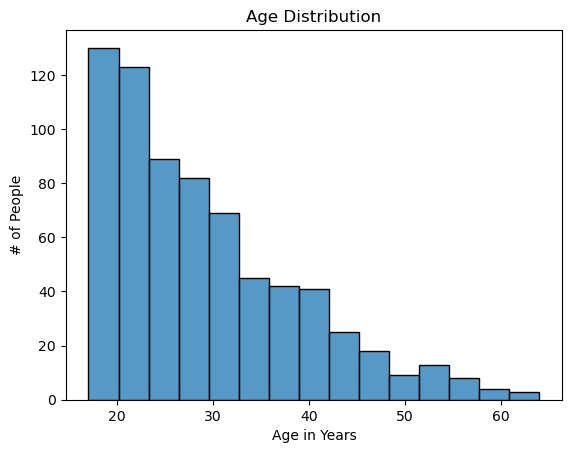

In [20]:
# Age Distribution

sns.histplot(df['age'])
plt.title("Age Distribution")
plt.ylabel('# of People')
plt.xlabel('Age in Years')
plt.show()

In [22]:
print(df['age'].describe())

count    701.000000
mean      29.194009
std        9.711526
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64


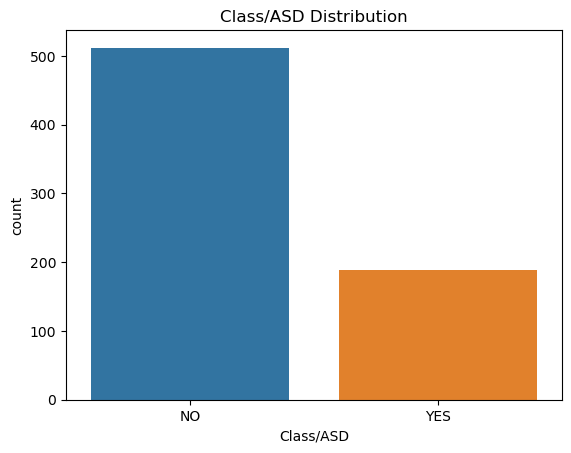

In [24]:
# Class/ASD Distribution

sns.countplot(x='Class/ASD', data=df)
plt.title("Class/ASD Distribution")
plt.show()

In [26]:
# Review Categorical Features
features = df.drop('Class/ASD', axis=1)
labels = pd.DataFrame(df['Class/ASD'])

mask_categorical = features.dtypes == object
df_categorical = features.loc[:, mask_categorical]

for i in range(df_categorical.shape[1]):
    print(df_categorical.iloc[:, i].value_counts())

gender
m    366
f    335
Name: count, dtype: int64
ethnicity
White-European       233
Asian                123
?                     93
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              11
Turkish                6
others                 1
Name: count, dtype: int64
jundice
no     632
yes     69
Name: count, dtype: int64
austim
no     610
yes     91
Name: count, dtype: int64
contry_of_res
'United States'           113
'United Arab Emirates'     82
India                      81
'New Zealand'              80
'United Kingdom'           77
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: count, Length: 67, dtype: int64
used_app_before
no     689
yes     12
Name: count, dtype: int64
age_desc
'18 and more'    701
Name: count, dtype: int64


In [28]:
df_encoded = df_categorical.copy(deep=True)

# Label Encoding for Categorical Features
le = LabelEncoder()
for col in df_encoded:
    df[col] = le.fit_transform(df[col])

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,10,0,0,10,0,6,0,5,NO
1,1,1,0,1,0,0,0,1,0,1,...,1,6,0,1,25,0,5,0,5,NO
2,1,1,0,1,1,0,1,1,1,1,...,1,6,1,1,61,0,8,0,3,YES
3,1,1,0,1,0,0,1,1,0,1,...,0,10,0,1,10,0,6,0,5,NO
4,1,0,0,0,0,0,0,1,0,0,...,0,2,0,0,32,0,2,0,1,NO


In [30]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

# Split the full dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X.info())
print(X.head())

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         701 non-null    int64  
 1   A2_Score         701 non-null    int64  
 2   A3_Score         701 non-null    int64  
 3   A4_Score         701 non-null    int64  
 4   A5_Score         701 non-null    int64  
 5   A6_Score         701 non-null    int64  
 6   A7_Score         701 non-null    int64  
 7   A8_Score         701 non-null    int64  
 8   A9_Score         701 non-null    int64  
 9   A10_Score        701 non-null    int64  
 10  age              701 non-null    float64
 11  gender           701 non-null    int32  
 12  ethnicity        701 non-null    int32  
 13  jundice          701 non-null    int32  
 14  austim           701 non-null    int32  
 15  contry_of_res    701 non-null    int32  
 16  used_app_before  701 non-null    int32  
 17  result           701 

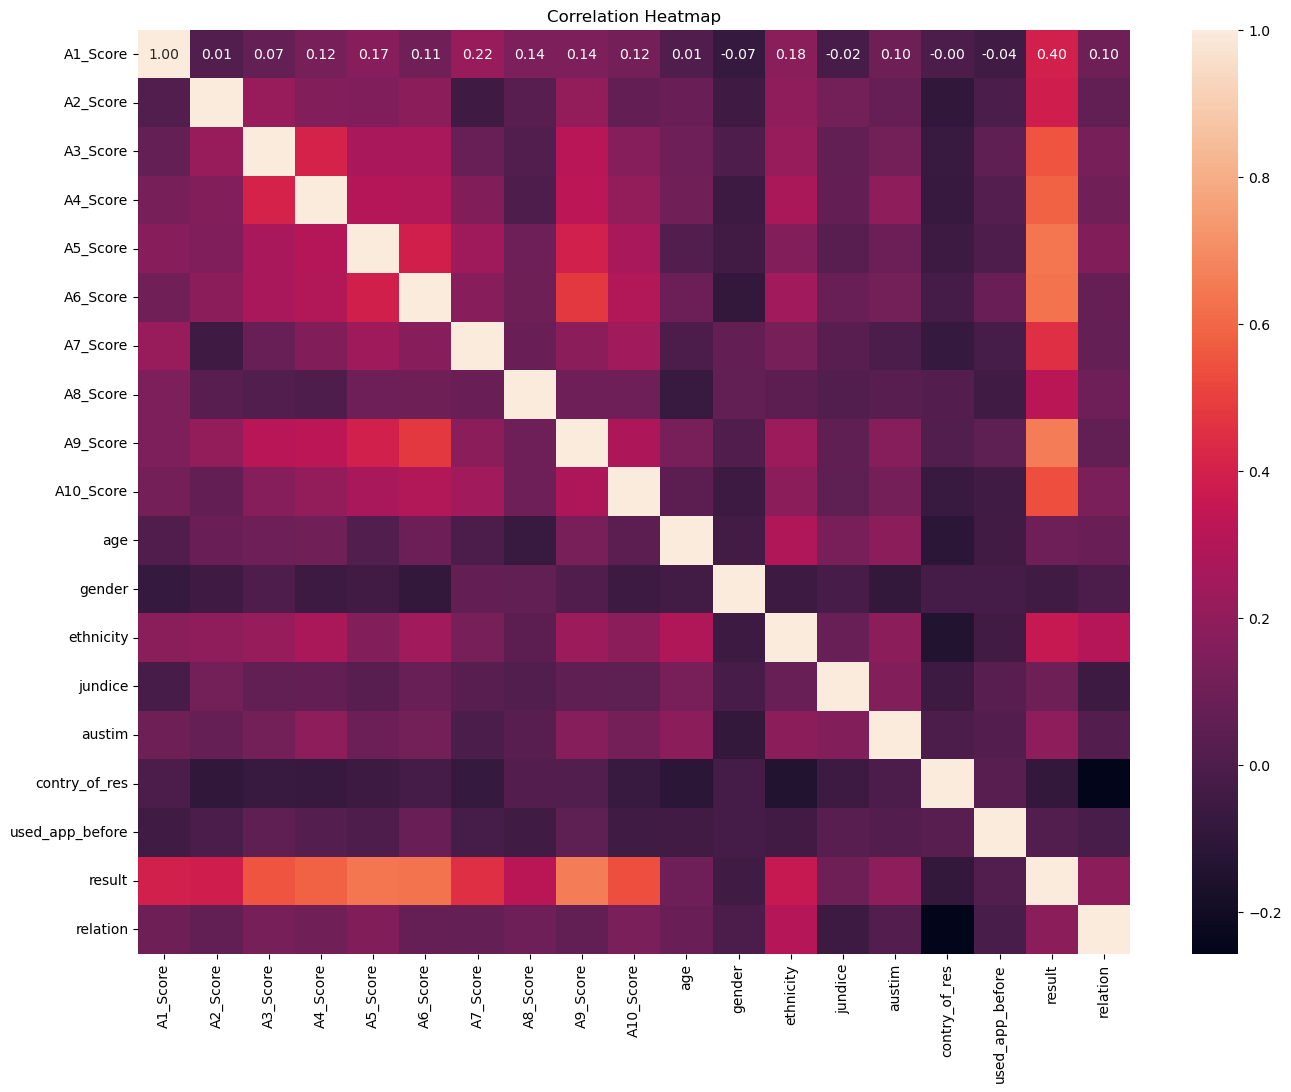

In [32]:
# Correlation Matrix

corr_matrix = X.drop('age_desc', axis=1).corr()

plt.figure(figsize = (16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
labels_encoded = labels.copy(deep=True)

dict_conversion = {'YES':0, 'NO':1}

labels_encoded['Class/ASD'] = labels_encoded['Class/ASD'].map(dict_conversion)

print(labels_encoded)

     Class/ASD
0            1
1            1
2            0
3            1
4            1
..         ...
699          0
700          1
701          0
702          1
703          0

[701 rows x 1 columns]


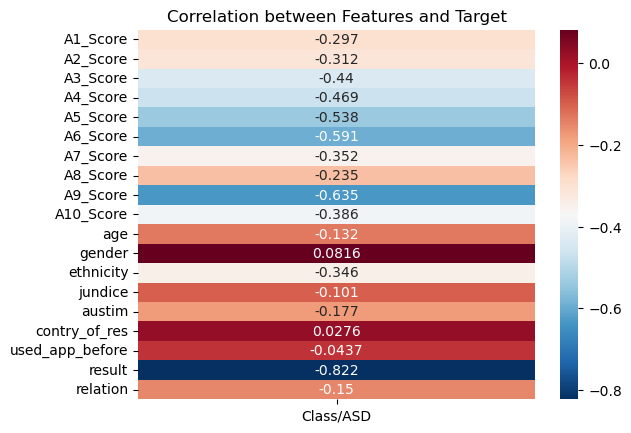

In [36]:
#Correlation between Features and Target

X_y = X.copy()
X_y['Class/ASD'] = labels_encoded

corr_matrix = X_y.corr()

corr_target = corr_matrix[['Class/ASD']].drop(labels=['Class/ASD', 'age_desc'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.title('Correlation between Features and Target')
plt.show()


# Model Building and Evaluation

In [39]:
models = [LogisticRegression(penalty='l2', max_iter=1000), KNeighborsClassifier(), RandomForestClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
    print('-'*55+'\n')


LogisticRegression:
Accuracy: 1.0000

Confusion Matrix:
[[152   0]
 [  0  59]]

Classification Report:
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       152
         YES       1.00      1.00      1.00        59

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211


-------------------------------------------------------

KNeighborsClassifier:
Accuracy: 0.8578

Confusion Matrix:
[[144   8]
 [ 22  37]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.87      0.95      0.91       152
         YES       0.82      0.63      0.71        59

    accuracy                           0.86       211
   macro avg       0.84      0.79      0.81       211
weighted avg       0.85      0.86      0.85       211


-------------------------------------------------------

RandomForestClassifier